# Applications of FT

Fouriertransform can be used for a lot of applications in Physics and Engineering.

One use case is to differentiate a function numerically.

For this we can use the formular:

$f'(t) = F^{-1}[i\omega F[f]]$

In [13]:
import numpy as np

import matplotlib.pyplot as plt


In [14]:
def fourier_deriv(n,y,a,b):
    if n%2 != 0:
        raise ValueError("n must be even")
    freq = 2* np.pi / (b-a)
    k2 = np.zeros(n)
    for i in range(1, n//2):
        k2[i] = i
        k2[n-i] = -i
    y_prime = np.fft.ifft(1j*freq*k2*np.fft.fft(y))
    return y_prime

def fourier_deriv2(n,y,a,b):
    if n%2 != 0:
        raise ValueError("n must be even")
    freq = 2 * np.pi / (b-a)
    k2 = np.zeros(n)
    for i in range(1, n//2):
        k2[i] = i
        k2[n-i] = -i
    y_prime = np.fft.ifft(-((freq*k2)**2) *np.fft.fft(y))
    return y_prime

def plt_fnc_deriv(n,a,b,f,title):
    x = np.linspace(a, b, n)
    y = f(x)
    #exclude the first and last 5 points to avoid edge effects
    off = 5 
    y_deriv = fourier_deriv(n, y, a, b)
    y_2deriv = fourier_deriv2(n, y, a, b)
    plt.plot(x, f(x), label= "f(x)")
    plt.plot(x[off:-off], y_deriv.real[off:-off], label='f \'(x)')
    plt.plot(x[off:-off], y_2deriv[off:-off].real, label='f \'\'(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Derivatives of: " + title)
    plt.legend(loc='upper right')





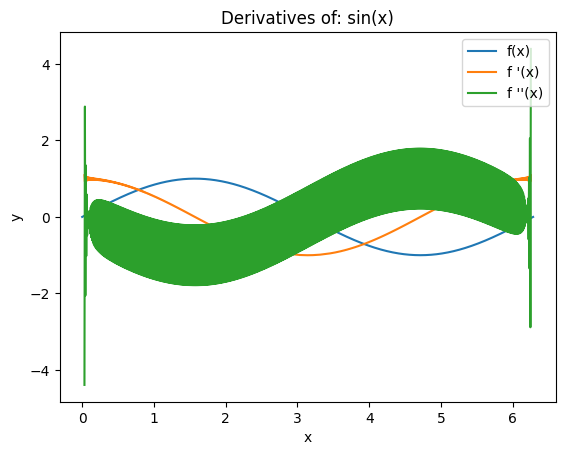

In [15]:
# test
n = 1000
a = 0
b = 2*np.pi
def f_sin(x):
    return np.sin(x) 
#make function go to zero at the edges of the interval by multiplying with a window function

plt_fnc_deriv(n,a,b,f_sin, "sin(x)")


The bounds seem to cause some edge effect where the second derivative oscillates. To avoid this lets try other bounds.

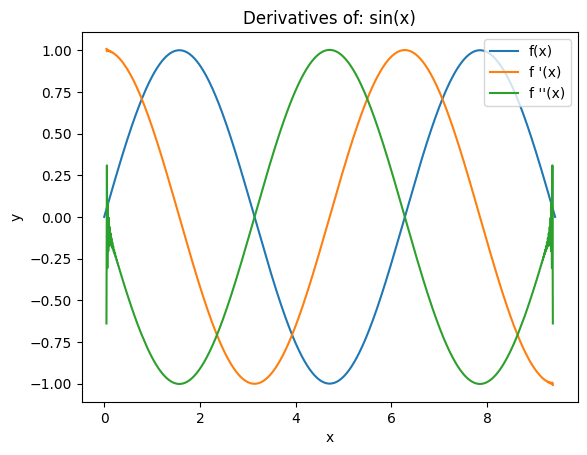

In [16]:
a = 0
b = 3*np.pi

plt_fnc_deriv(n,a,b,f_sin, "sin(x)")

This fixes the issue. Antoher option is to try again while smoothing the function at the edges using a window function. 

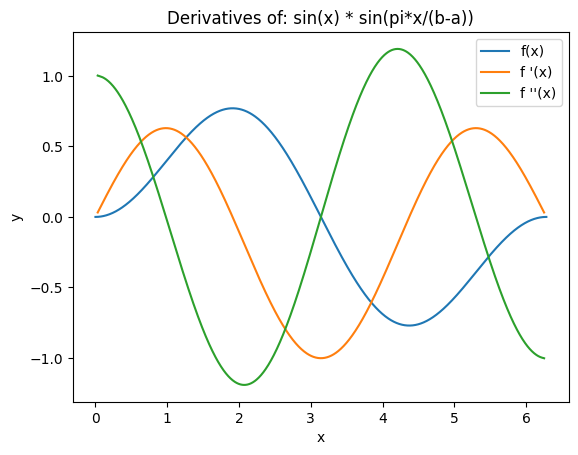

In [17]:
a = 0
b = 2*np.pi
def f_sin_window(x):
    return np.sin(x) * np.sin(np.pi*x/(b-a))

plt_fnc_deriv(n,a,b,f_sin_window, "sin(x) * sin(pi*x/(b-a))")

Even though the functions are not properly normalized now the general idea is still clear and the derivatives are sensible.

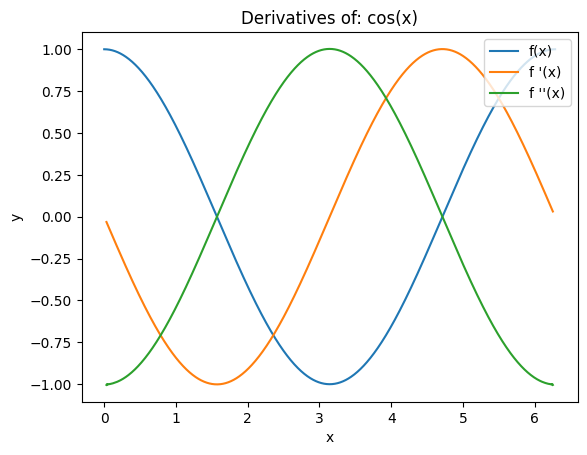

In [18]:
# test
n = 1000
a = 0
b = 2*np.pi
def f_cos(x):
    return np.cos(x)

plt_fnc_deriv(n,a,b,f_cos, "cos(x)")

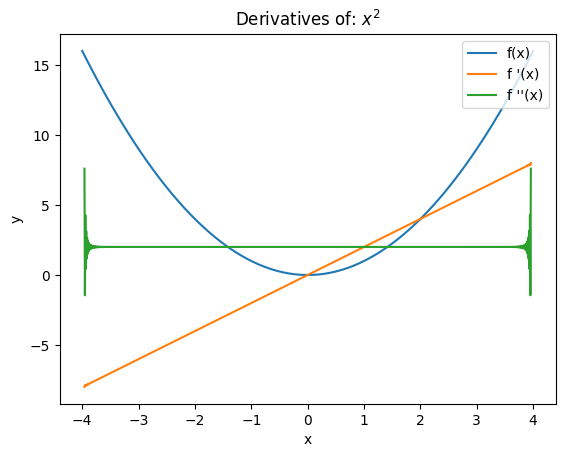

In [19]:
n = 1000
a = -4
b = 4
def f_sq(x):
    return x**2

plt_fnc_deriv(n,a,b,f_sq, "$x^2$")

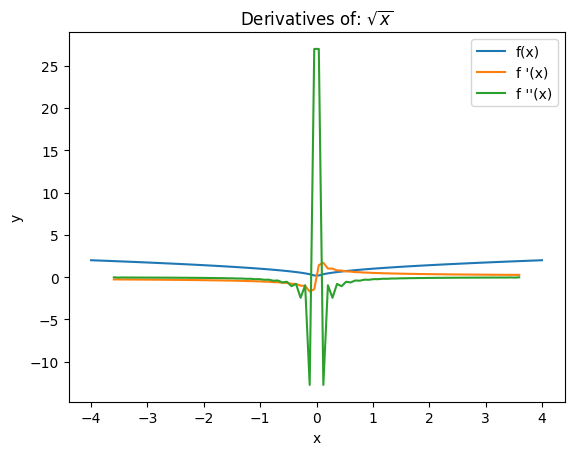

In [20]:
def f_sqrt(x):
    return np.sqrt(abs(x))

n = 100

plt_fnc_deriv(n,a,b,f_sqrt, "$\sqrt{x}$")

Another thing we can do by fourier transform is shifting a function to left or right. In the following I will shift all the functions used before to the right by one.

To shift a function we assume the function is periodic outside of the measured domain. We use the following relation:

$f_{shifted}(x) = F^{-1}[e^{-i\omega t_0}F[f(x)]]$

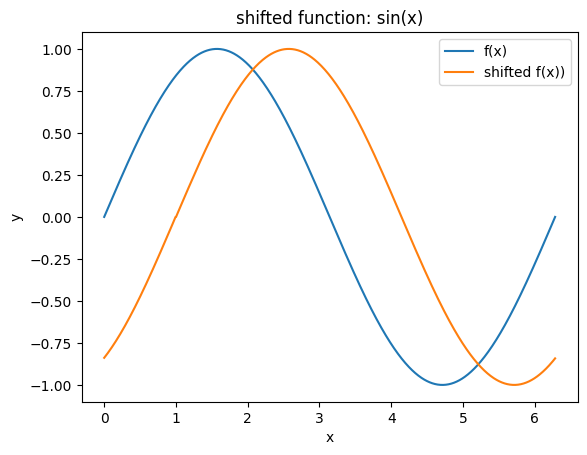

In [21]:
def fourier_shift(n, y, a, b, t_0):
    freq = 2 * np.pi / (b - a)
    k2 = np.zeros(n, dtype=complex)
    for i in range(1, n//2 ):
        k2[i] = i
        k2[n-i] = -i
    k2 *= freq
    y_shift = np.fft.ifft(np.exp(-1j * k2 * t_0) * np.fft.fft(y))
    return y_shift


def plt_fnc_shift(n, a, b, f, t_0=1, title=""):
    x = np.linspace(a, b, n)
    y = f(x)
    y_shift = fourier_shift(n, y, a, b, t_0)
    plt.plot(x, f(x), label="f(x)")
    plt.plot(x, y_shift.real, label="shifted f(x))")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend( loc='upper right')
    plt.title("shifted function: " + title)

n = 1000
a = 0
b = 2 * np.pi
plt_fnc_shift(n,a,b,f_sin, t_0=1, title="sin(x)")

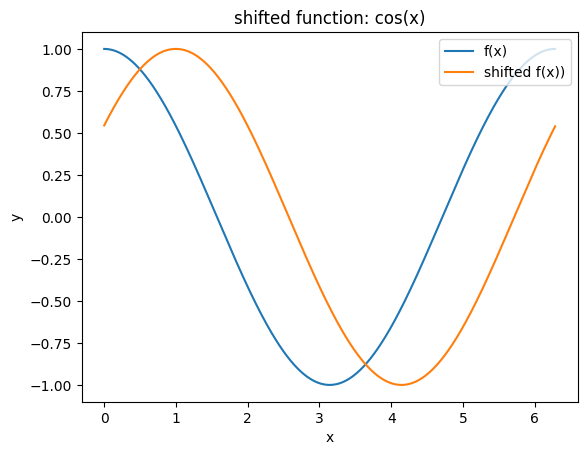

In [22]:
plt_fnc_shift(n,a,b,f_cos , t_0=1, title="cos(x)")

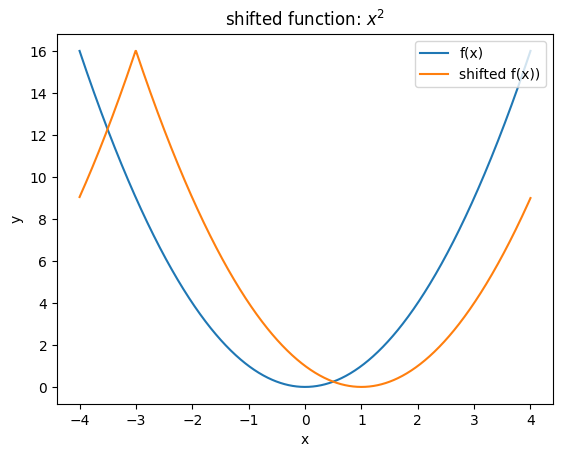

In [23]:
a = -4
b = 4

plt_fnc_shift(n,a,b,f_sq , t_0=1, title="$x^2$")

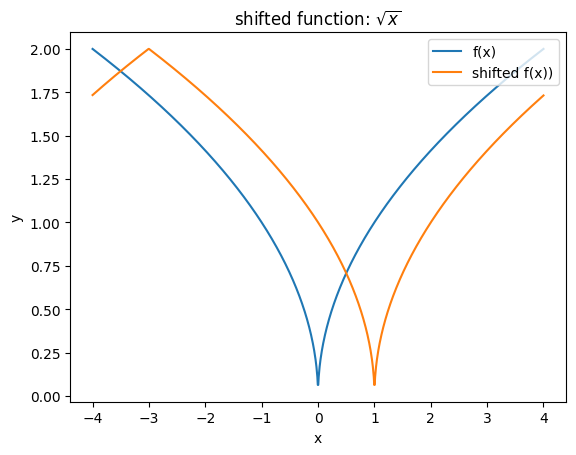

In [24]:
plt_fnc_shift(n,a,b,f_sqrt , t_0=1, title="$\sqrt{x}$")

We can see that for the periodic functions the shift looks fine. The function is just set one unit to the right.
However for the fouriertransform we assume the function to be periodic outside of the bounds of the fouriertransform. 
This is not the case for the last two functions. The fourier shift "forces" periodicity and adds the piece that was "cut off" at the right to the left side.